In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('SMSSpamCollection.csv')
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [4]:
df['Class'] = df['Class'].map({'ham': 0 , 'spam':1})

In [5]:
y = df['Class']
X = df['sms']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words = 'english')

In [9]:
vect.fit(X_train)
X_train_t = vect.transform(X_train)
X_test_t = vect.transform(X_test)

In [10]:
X_train_t.shape

(3900, 7004)

In [14]:
v = list(vect.get_stop_words())
v

['after',
 'thin',
 'cry',
 'less',
 'have',
 'because',
 'own',
 'eg',
 'full',
 'meanwhile',
 'whereupon',
 'these',
 'itself',
 'five',
 'towards',
 'between',
 'us',
 'cant',
 'therein',
 'some',
 'too',
 're',
 'besides',
 'such',
 'it',
 'eleven',
 'there',
 'almost',
 'call',
 'my',
 'always',
 'un',
 'system',
 'for',
 'take',
 'thereby',
 'yet',
 'con',
 'be',
 'by',
 'himself',
 'will',
 'nobody',
 'from',
 'only',
 'yours',
 'wherever',
 'me',
 'your',
 'give',
 'to',
 'within',
 'until',
 'de',
 'twelve',
 'been',
 'seemed',
 'fire',
 'whenever',
 'where',
 'onto',
 'during',
 'ten',
 'wherein',
 'mill',
 'themselves',
 'thick',
 'cannot',
 'that',
 'part',
 'front',
 'hers',
 'seeming',
 'or',
 'interest',
 'could',
 'alone',
 'was',
 'our',
 'enough',
 'afterwards',
 'out',
 'her',
 'otherwise',
 'herein',
 'the',
 'why',
 'few',
 'made',
 'bottom',
 'anyway',
 'thence',
 'while',
 'how',
 'keep',
 'off',
 'much',
 'every',
 'show',
 'third',
 'since',
 'whence',
 'agains

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score , roc_curve

mnb = MultinomialNB()

mnb.fit(X_train_t,y_train)

y_train_pred = mnb.predict(X_train_t)
y_train_prob = mnb.predict_proba(X_train_t)[:,1]

print('Train - Confusion Matrix',confusion_matrix(y_train,y_train_pred))
print()
print('Train - Accuracy Score',accuracy_score(y_train,y_train_pred))
print()
print('Train - AUC',roc_auc_score(y_train,y_train_prob))

Train - Confusion Matrix [[3363   14]
 [   8  515]]

Train - Accuracy Score 0.9943589743589744

Train - AUC 0.998299711636076


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
mnb = MultinomialNB()

mnb.fit(X_train_t, y_train)

y_train_pred=mnb.predict(X_train_t)
y_train_prob=mnb.predict_proba(X_train_t)[:,1]

print('Train - Confusion Matrix:','\n', confusion_matrix(y_train, y_train_pred))
print('Train - Accuracy score:','\n', accuracy_score(y_train, y_train_pred))
print('Train - AUC:',roc_auc_score(y_train, y_train_prob))

Train - Confusion Matrix: 
 [[3363   14]
 [   8  515]]
Train - Accuracy score: 
 0.9943589743589744
Train - AUC: 0.998299711636076


In [22]:
y_test_pred = mnb.predict(X_test_t)
y_test_prob = mnb.predict_proba(X_test_t)[:,1]

print('Test - Confusion Matrix\n',confusion_matrix(y_test,y_test_pred))
print()
print('Test - Accuracy Score',accuracy_score(y_test,y_test_pred))
print()
print('Test - AUC',roc_auc_score(y_test,y_test_prob))

Test - Confusion Matrix
 [[1438   10]
 [  11  213]]

Test - Accuracy Score 0.9874401913875598

Test - AUC 0.9851950966850829


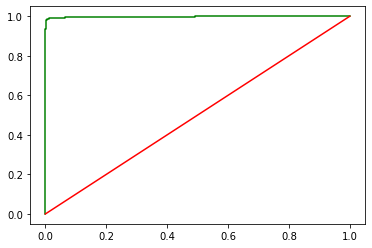

In [23]:
fpr,tpr,thresholds = roc_curve(y_train,y_train_prob)
thresholds[0]=thresholds[0]-1
plt.plot(fpr,tpr, 'g')
plt.plot(fpr,fpr, color='r')
plt.show()

In [26]:
spm = pd.DataFrame({'fpr':fpr,'tpr':tpr , 'thresholds':thresholds})
spm.head()

,fpr,tpr,thresholds
0,0.0,0.000000,1.0
1,0.0,0.365201,1.0
2,0.0,0.388145,1.0
3,0.0,0.409178,1.0
4,0.0,0.413002,1.0


In [28]:
spm[(spm['fpr']==0) & (spm['tpr']>0.5)]

,fpr,tpr,thresholds
22,0.0,0.500956,1.000000
23,0.0,0.504780,1.000000
24,0.0,0.510516,1.000000
25,0.0,0.518164,1.000000
26,0.0,0.521989,1.000000
27,0.0,0.539197,1.000000
28,0.0,0.543021,1.000000
29,0.0,0.550669,1.000000
30,0.0,0.554493,1.000000
31,0.0,0.571702,1.000000
